In [1]:
import pandas as pd
import numpy as np

# Нормальные распределения

<Axes: >

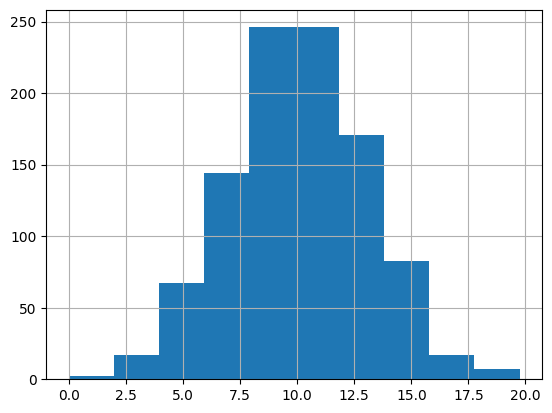

In [2]:
pd.Series(np.random.normal(10, 3, 1000)).hist()

<Axes: >

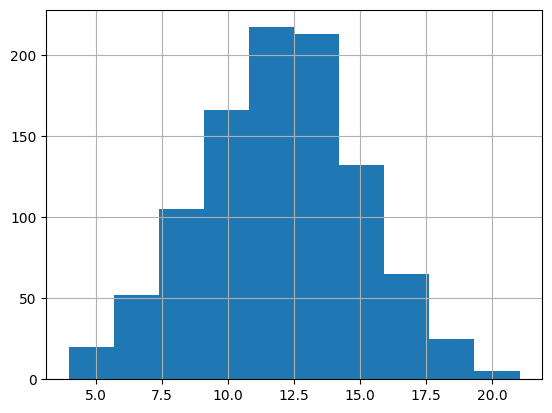

In [3]:
pd.Series(np.random.normal(12, 3, 1000)).hist()

In [4]:
from scipy.stats import ttest_ind

In [5]:
baseline = 10
mde = 2
sample_size = 37
n = 1000
result = []

for _ in range(n):
  group_A = np.random.normal(baseline, 3, sample_size)
  group_B = np.random.normal(baseline + mde, 3, sample_size)
  t_score, p_val = ttest_ind(group_A, group_B, equal_var=False)
  result.append((t_score, p_val))


In [6]:
pd.DataFrame(result, columns = ['t_score','p_val'])

,t_score,p_val
0,-1.381254,0.171473
1,-0.809125,0.421162
2,-2.450877,0.016753
3,-3.729616,0.000380
4,-1.437685,0.155142
...,...,...
995,-1.581626,0.118155
996,-4.568892,0.000022
997,-2.857568,0.005578
998,-4.206840,0.000075


In [7]:
t = pd.DataFrame(result, columns = ['t_score','p_val'])
(t['p_val'] < 0.05).mean()

0.792

Подогнали размер выборки под мощность теста

Для того, чтобы пользоваться ти тестом необходимо, чтобы :

1. среднее выборок было распределено нормально.
2. p-value для одинаковых выборок распределялось равномерно
3. теоритическая ошибка первого рода(false positive) == практической ошибке первого рода

Нормальность мы проверяем не спомощью теста(тк он корректно работает только на маленьких выборках)

Проверяем нормальность с помощью куку-графика))

In [8]:
import seaborn as sns

In [9]:
A = np.random.normal(10, 3, 100)

<Axes: ylabel='Count'>

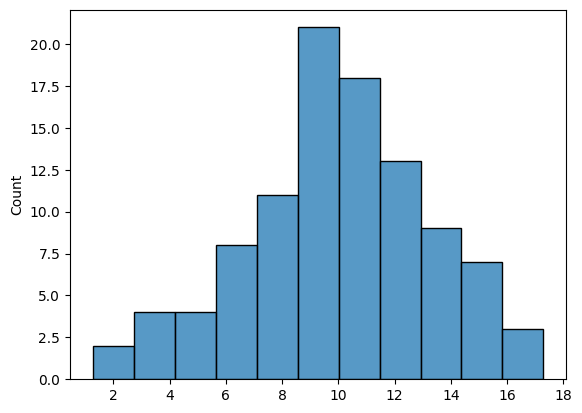

In [10]:
sns.histplot(A)

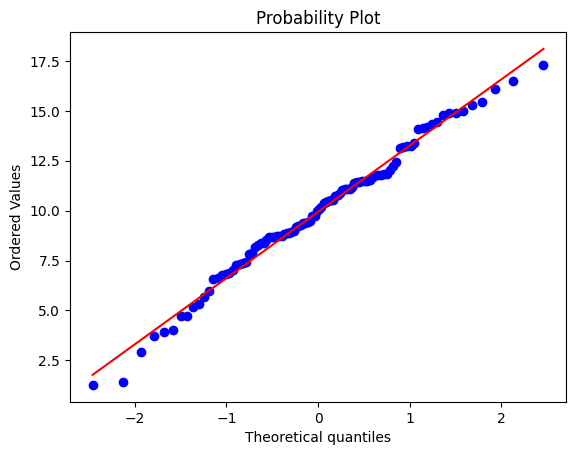

In [11]:
import pylab
import scipy.stats as stats

stats.probplot(A,plot=pylab)
pylab.show()

In [12]:
B = np.random.lognormal(size=100)

<Axes: ylabel='Count'>

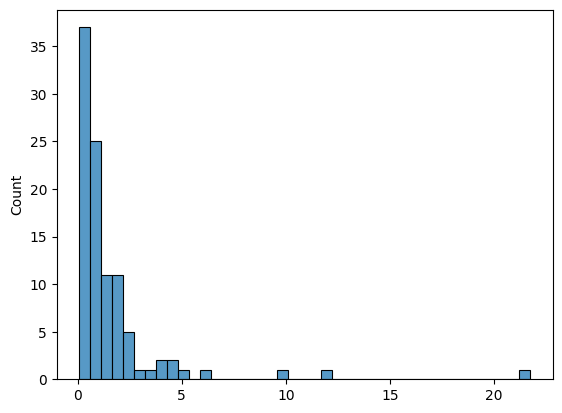

In [13]:
sns.histplot(B)

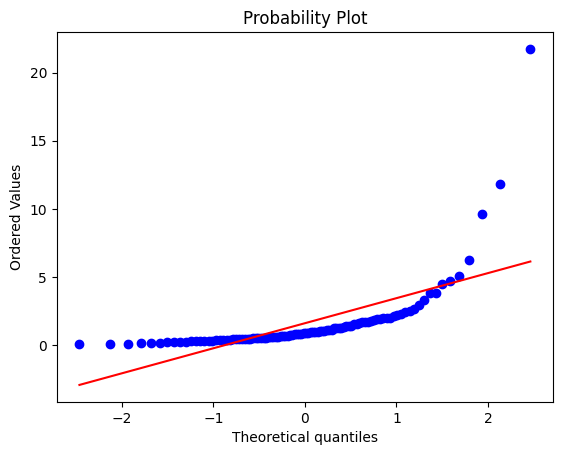

In [14]:
stats.probplot(B,plot=pylab)
pylab.show()

In [15]:
baseline = 10
mde = 2
sample_size = 37
n = 1000
result = []

for _ in range(n):
  group_A = np.random.normal(baseline, 3, sample_size)
  group_B = np.random.normal(baseline, 3, sample_size)
  t_score, p_val = ttest_ind(group_A, group_B, equal_var=False)
  result.append((t_score, p_val))

In [16]:
pd.DataFrame(result, columns = ['t_score','p_val'])

,t_score,p_val
0,0.060361,0.952053
1,0.862048,0.391543
2,-0.073204,0.941853
3,0.602045,0.549040
4,-1.989463,0.050612
...,...,...
995,-1.846985,0.068865
996,2.605142,0.011155
997,0.885782,0.378744
998,-2.594328,0.011483


<Axes: >

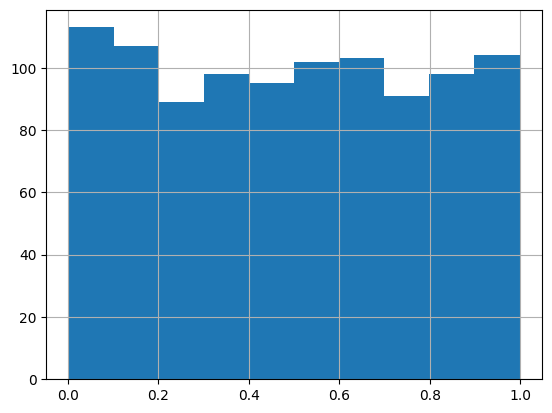

In [17]:
t = pd.DataFrame(result, columns = ['t_score','p_val'])
t['p_val'].hist()

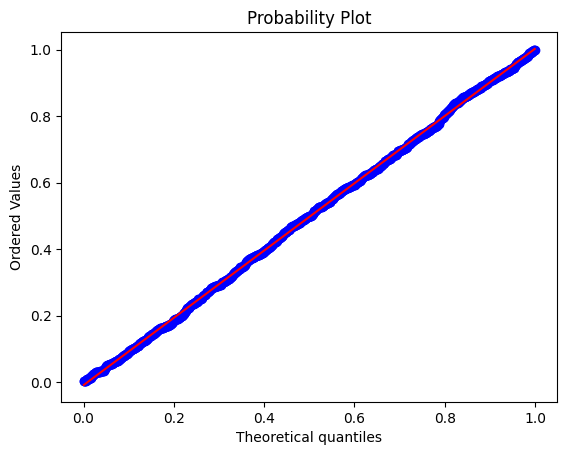

In [18]:
stats.probplot(t['p_val'],dist='uniform',plot=pylab)
pylab.show()

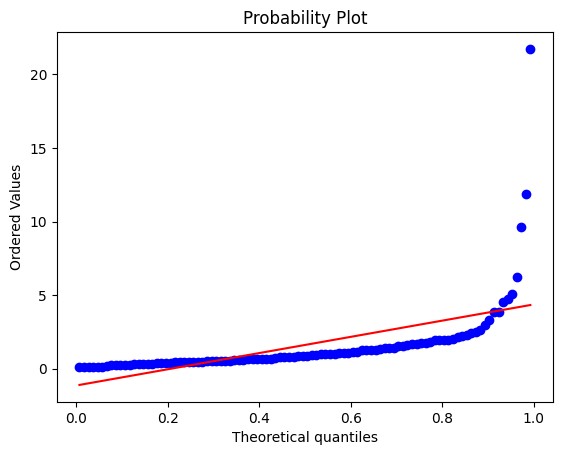

In [19]:
stats.probplot(B,dist='uniform',plot=pylab)
pylab.show()

In [20]:
import statsmodels.stats.api as sms

In [21]:
effect_size = (12-10)/3

In [22]:
sms.TTestIndPower().solve_power(effect_size,alpha = .05,power = 0.8, ratio = 1)

36.305687896793614

Определили размер семпла с помощью мат модели

# Логнормальные распределения

In [23]:
a = np.random.lognormal(mean=5, sigma=2, size = 1000)
b = np.random.lognormal(mean=5.04, sigma=2, size = 1000)

(-1000.0, 100000.0)

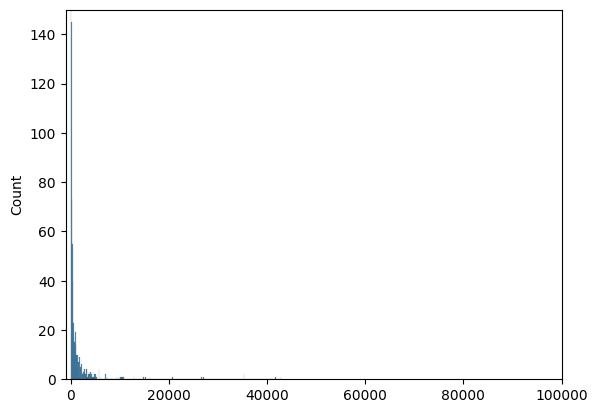

In [24]:
import matplotlib.pyplot as plt
sns.histplot(a)
plt.ylim(0, 150)
plt.xlim(-1000,100000)

In [25]:
from tqdm.notebook import tqdm
t = [np.random.lognormal(mean=5, sigma=2, size = 1000).mean() for _ in tqdm(range(10000))]

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

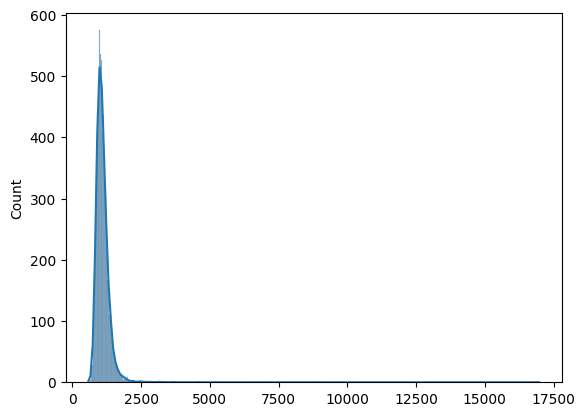

In [26]:
sns.histplot(t, kde=True)

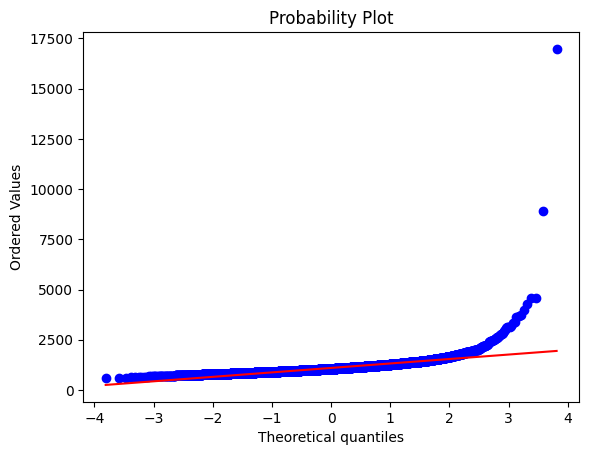

In [27]:
stats.probplot(t,dist='norm',plot=pylab)
pylab.show()

In [28]:
pd.Series(t).mean()

1097.89356345202

<Axes: >

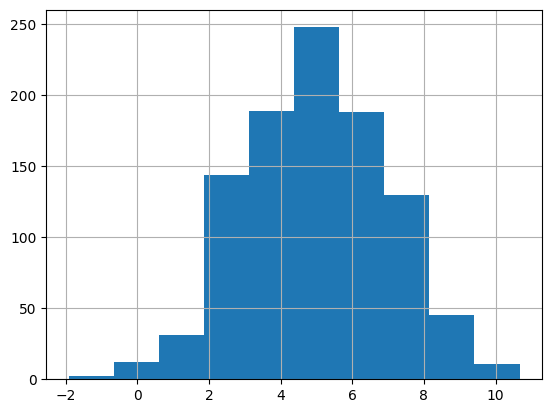

In [29]:
np.log(pd.Series(a)).hist()

#Считаем размер выборкпи

In [30]:
a = np.random.lognormal(mean=5, sigma=2, size = 10000)
b = np.random.lognormal(mean=5.04, sigma=2, size = 10000)

In [31]:
a_mean = pd.Series([np.random.lognormal(mean=5, sigma=2, size = 10000).mean() for _ in range(10000)]).mean()

In [32]:
b_mean = pd.Series([np.random.lognormal(mean=5.04, sigma=2, size = 10000).mean() for _ in range(10000)]).mean()

In [33]:
a_mean, b_mean

(1095.7857238989502, 1142.708953457358)

In [34]:
a_mean_teor = np.exp(5 + (2**2)/2)
a_mean_teor

1096.6331584284585

In [35]:
b_mean_teor = np.exp(5.04 + (2**2)/2)
b_mean_teor

1141.387606628968

In [36]:
effect_size = (b_mean_teor - a_mean_teor)/ a.std()

In [37]:
sms.TTestIndPower().solve_power(effect_size=effect_size,
                                power=.8,
                                alpha=.05,
                                ratio=1)

172816.2108740934

In [38]:
sample_size = 231257
n = 1000
result = []

for _ in range(n):
  a = np.random.lognormal(mean=5, sigma=2, size = sample_size)
  b = np.random.lognormal(mean=5.04, sigma=2, size = sample_size)
  t_score, p_val = ttest_ind(a, b, equal_var=False)
  result.append((t_score, p_val))

In [39]:
t = pd.DataFrame(result)


In [40]:
t

,0,1
0,-3.689633,0.000225
1,-0.572676,0.566865
2,-1.586182,0.112699
3,-3.259999,0.001114
4,-2.628251,0.008583
...,...,...
995,-1.810802,0.070172
996,-1.369866,0.170729
997,-2.079659,0.037557
998,-2.431336,0.015044


In [41]:
(t[1] < .05).mean()

0.509

Делаем вывод, что нельзя тут использовать t-test

In [42]:
a = np.log(np.random.lognormal(mean=5, sigma=2, size = 10000))
b = np.log(np.random.lognormal(mean=5.04, sigma=2, size = 10000))

In [43]:
sample_size = 100000
n = 1000
result = []

for _ in range(n):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size = sample_size))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size = sample_size))
  t_score, p_val = ttest_ind(a, b, equal_var=False)
  result.append((t_score, p_val))

In [44]:
t = pd.DataFrame(result)
(t[1] < .05).mean()

0.991

In [45]:
effect_size = (np.log(b_mean_teor) - np.log(a_mean_teor))/ a.std()

In [46]:
sms.TTestIndPower().solve_power(effect_size=effect_size,
                                power=.8,
                                alpha=.05,
                                ratio=1)

39309.21872395832

In [47]:
sample_size = 39589
n = 1000
result = []

for _ in range(n):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size = sample_size))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size = sample_size))
  t_score, p_val = ttest_ind(a, b, equal_var=False)
  result.append((t_score, p_val))

t = pd.DataFrame(result)
(t[1] < .05).mean()

0.795